#Exercise from 2/9/2021 written exam

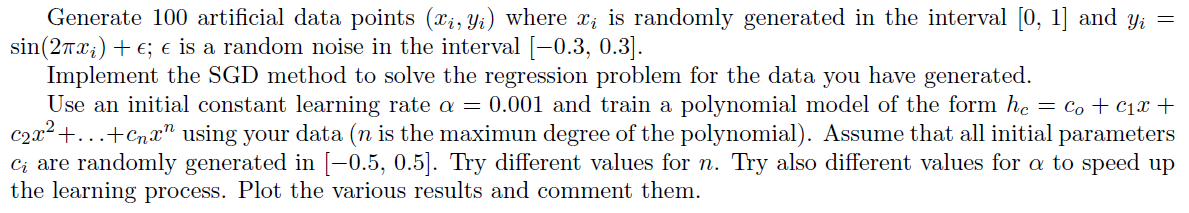

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import jax.numpy as jnp
import jax

In [52]:
num_points=100
noise = 0.3
f = lambda x : np.sin(2*np.pi*x) 

np.random.seed(0)
x = np.random.rand(num_points)
y_ex = f(x)
y = y_ex + (2*np.random.rand(num_points)-1)*noise

a=0 
b=1

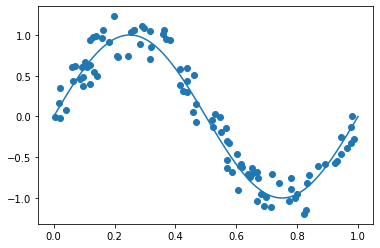

In [53]:
x_fine = np.linspace(0,1,1000)
plt.plot(x_fine, f(x_fine))
plt.scatter(x,y)

In [77]:
np.sqrt(np.mean((y-y_ex)**2))

0.16687815856316887

In [56]:
def model(x, params):
   return sum([c*x**p for (p,c) in enumerate(params)])

In [72]:
def loss(x, y, params):
  return jnp.mean((model(x,params) - y)**2)

  0%|          | 0/20000 [00:00<?, ?it/s]

RMSE: 0.307


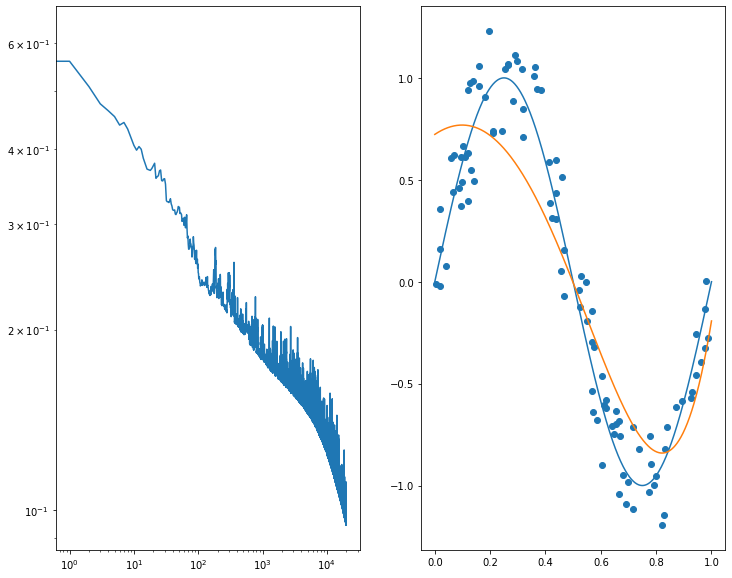

In [76]:
from tqdm.notebook import tqdm
#hyperparameters
learning_rate = 2e-2
n = 5
num_epochs = 20000

grad_jit = jax.jit(jax.grad(loss,argnums=2))
loss_jit = jax.jit(loss)



#training 
params = (2 * np.random.rand(n+1) - 1) * 0.5
history = [loss_jit(x,y,params)]

for epoch in tqdm(range(num_epochs)):
  mini_batch = np.random.choice(num_points)
  params -= learning_rate*grad_jit(x[mini_batch],y[mini_batch],params)
  history.append(loss_jit(x, y, params))

print("RMSE: %1.3f" % jnp.sqrt(history[-1]))

fig, axs = plt.subplots(1, 2, figsize=(12,10))
axs[0].loglog(history)
axs[1].plot(x_fine, f(x_fine))
axs[1].scatter(x,y)
axs[1].plot(x_fine, model(x_fine,params))


